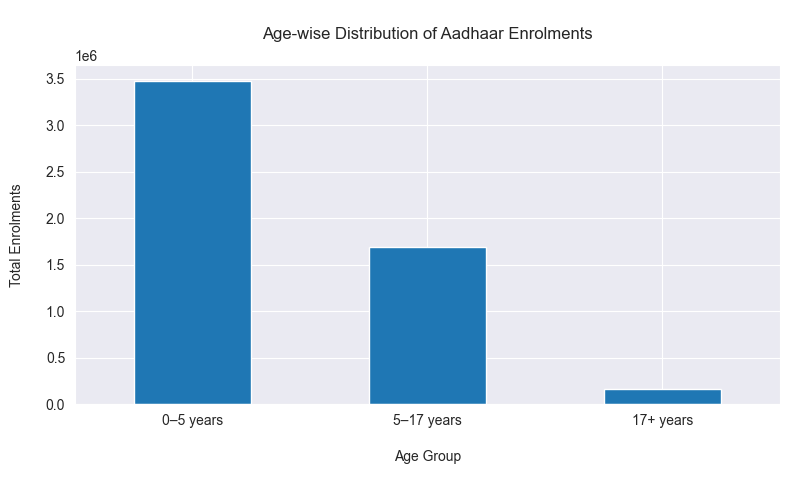

In [1]:
# Load CLEANED enrolment data for age distribution
import matplotlib.pyplot as plt
import pandas as pd

df_age = pd.read_csv("../data/processed/cleaned/enrolment_clean.csv")

# optional: remove unset rows
df_age = df_age[
    (df_age["state"] != "<unset>") &
    (df_age["district"] != "<unset>") &
    (df_age["pincode"] != "<unset>")
]

# Aggregate age groups
age_totals = df_age[["age_0_5", "age_5_17", "age_17_plus"]].sum()
age_totals.index = ["0–5 years", "5–17 years", "17+ years"]

plt.figure(figsize=(8, 5))
age_totals.plot(kind="bar")

plt.title("\nAge-wise Distribution of Aadhaar Enrolments\n")
plt.xlabel("\nAge Group\n")
plt.ylabel("Total Enrolments\n")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



In [2]:
import plotly.express as px
import pandas as pd

df = pd.read_csv("../data/processed/analysis/enrolment_analysis.csv")
df["date"] = pd.to_datetime(df["date"])

# THIS creates daily_enrolment
daily_enrolment = df.groupby("date")["total_enrolment"].sum()

# convert Series → DataFrame
daily_enrolment_df = daily_enrolment.reset_index()
daily_enrolment_df.columns = ["date", "total_enrolment"]

fig = px.line(
    daily_enrolment_df,
    x="date",
    y="total_enrolment",
    title="Total Aadhaar Enrolment Over Time"
)

fig.show()


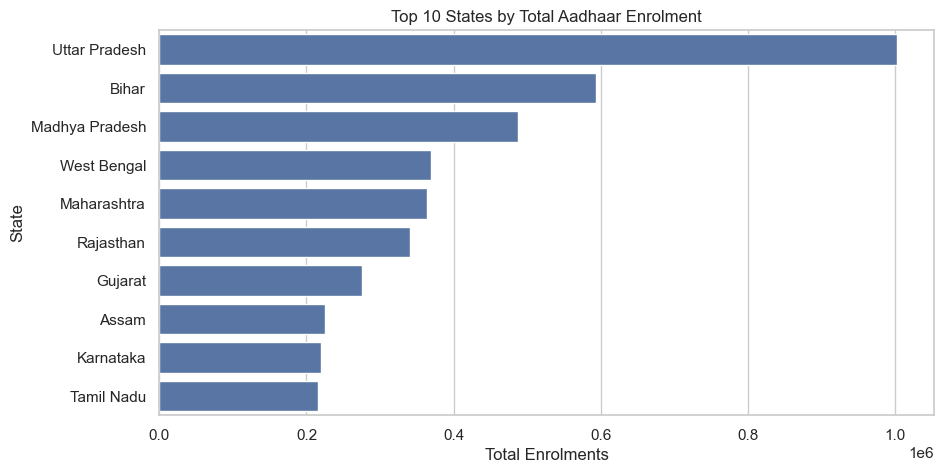

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# load enrolment analysis data
df = pd.read_csv("../data/processed/analysis/enrolment_analysis.csv")

# aggregate total enrolment by state
state_enrolment = (
    df.groupby("state")["total_enrolment"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# top 10 states
top_states = state_enrolment.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_states,
    x="total_enrolment",
    y="state"
)

plt.title("Top 10 States by Total Aadhaar Enrolment")
plt.xlabel("Total Enrolments")
plt.ylabel("State")
plt.show()


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# load enrolment analysis data
df = pd.read_csv("../data/processed/analysis/enrolment_analysis.csv")

# focus on the highest enrolment state
TOP_STATE = "Uttar Pradesh"
state_df = df[df["state"] == TOP_STATE]


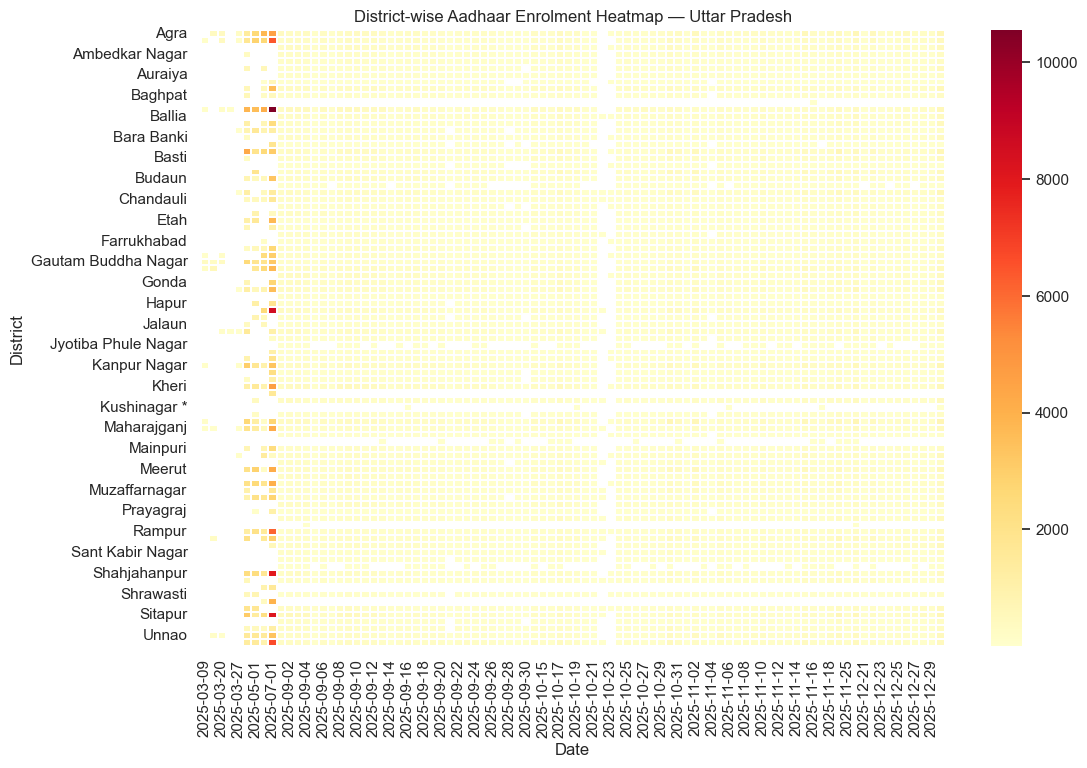

In [5]:
# aggregate enrolment by district and date
district_time = (
    state_df
    .groupby(["district", "date"])["total_enrolment"]
    .sum()
    .reset_index()
)

# pivot for heatmap
heatmap_data = district_time.pivot(
    index="district",
    columns="date",
    values="total_enrolment"
)

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    cmap="YlOrRd",
    linewidths=0.1
)

plt.title(f"District-wise Aadhaar Enrolment Heatmap — {TOP_STATE}")
plt.xlabel("Date")
plt.ylabel("District")
plt.show()


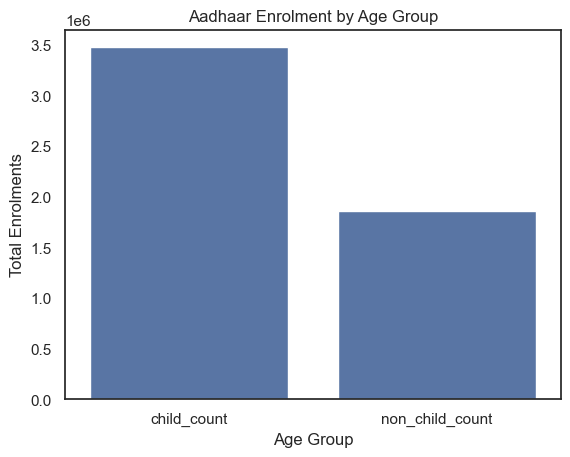

In [6]:
age_totals = df[["child_count", "non_child_count"]].sum().reset_index()
age_totals.columns = ["age_group", "count"]

sns.barplot(data=age_totals, x="age_group", y="count")
plt.title("Aadhaar Enrolment by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Enrolments")
plt.show()


In [7]:
print(df.columns.tolist())


['date', 'state', 'district', 'pincode', 'child_count', 'non_child_count', 'total_enrolment']


In [8]:
df = pd.read_csv("../data/processed/analysis/updates_analysis.csv")


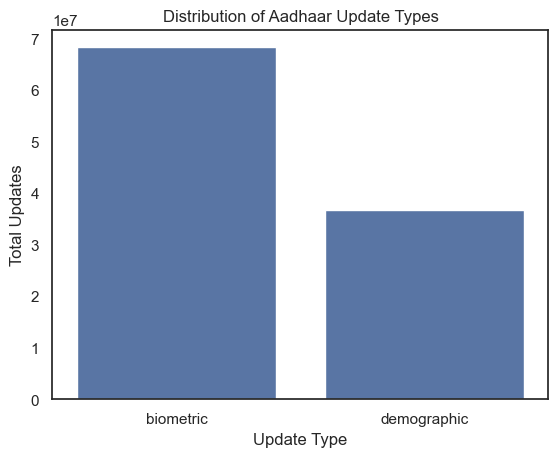

In [9]:
update_counts = (
    df.groupby("update_type")["total_updates"]
    .sum()
    .reset_index()
)

sns.barplot(data=update_counts, x="update_type", y="total_updates")
plt.title("Distribution of Aadhaar Update Types")
plt.xlabel("Update Type")
plt.ylabel("Total Updates")
plt.show()


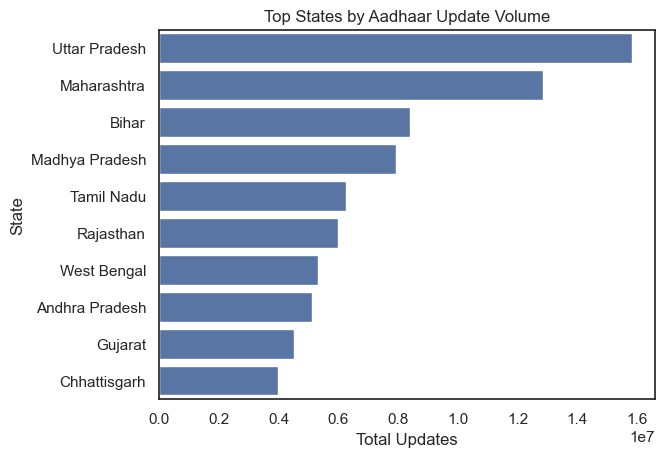

In [10]:
state_updates = (
    df.groupby("state")["total_updates"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()

)
state_updates["state"] = state_updates["state"].str.title()
sns.barplot(data=state_updates, x="total_updates", y="state")
plt.title("Top States by Aadhaar Update Volume")
plt.xlabel("Total Updates")
plt.ylabel("State")
plt.show()


In [11]:
# load enrolment and update datasets explicitly
enrol_df = pd.read_csv("../data/processed/analysis/enrolment_analysis.csv")
upd_df   = pd.read_csv("../data/processed/analysis/updates_analysis.csv")



In [12]:
# normalize state names in both datasets
enrol_df["state"] = enrol_df["state"].astype(str).str.strip().str.title()
upd_df["state"]   = upd_df["state"].astype(str).str.strip().str.title()


In [13]:
enrol_state = enrol_df.groupby("state")["total_enrolment"].sum()
update_state = upd_df.groupby("state")["total_updates"].sum()

common_states = enrol_state.index.intersection(update_state.index)

print("Common states:", len(common_states))
common_states[:10]



Common states: 36


Index(['Andaman And Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra And Nagar Haveli And Daman And Diu', 'Delhi', 'Goa'],
      dtype='object', name='state')

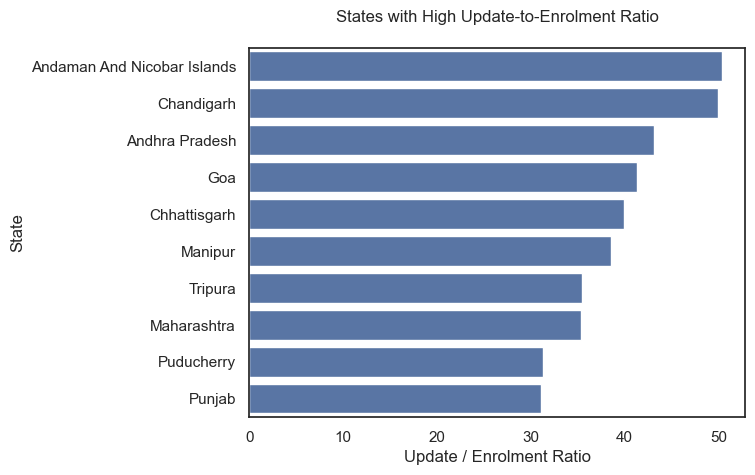

In [14]:
enrol_state = enrol_df.groupby("state")["total_enrolment"].sum()
update_state = upd_df.groupby("state")["total_updates"].sum()

ratio_df = (update_state / enrol_state).dropna().reset_index()
ratio_df.columns = ["state", "update_enrolment_ratio"]

top_ratio = ratio_df.sort_values(
    "update_enrolment_ratio", ascending=False
).head(10)

sns.barplot(
    data=top_ratio,
    x="update_enrolment_ratio",
    y="state"
)

plt.title("States with High Update-to-Enrolment Ratio\n")
plt.xlabel("Update / Enrolment Ratio")
plt.ylabel("State")
plt.show()


In [15]:
# normalize state names again (safe even if already done)
enrol_df["state"] = enrol_df["state"].astype(str).str.strip().str.title()
upd_df["state"]   = upd_df["state"].astype(str).str.strip().str.title()

# aggregate
enrol_state = enrol_df.groupby("state")["total_enrolment"].sum()
update_state = upd_df.groupby("state")["total_updates"].sum()

# merge safely
ratio_df = (
    enrol_state.to_frame("total_enrolment")
    .merge(
        update_state.to_frame("total_updates"),
        left_index=True,
        right_index=True,
        how="inner"
    )
)

# avoid tiny denominators
ratio_df = ratio_df[ratio_df["total_enrolment"] > 0]

# compute ratio
ratio_df["update_enrolment_ratio"] = (
    ratio_df["total_updates"] / ratio_df["total_enrolment"]
)

ratio_df = ratio_df.reset_index()

# FILTER to avoid small-volume distortion
ratio_df_filtered = ratio_df[
    ratio_df["total_enrolment"] >
    ratio_df["total_enrolment"].quantile(0.25)
]


In [16]:
plot_df = ratio_df_filtered.sort_values(
    "update_enrolment_ratio", ascending=True
)


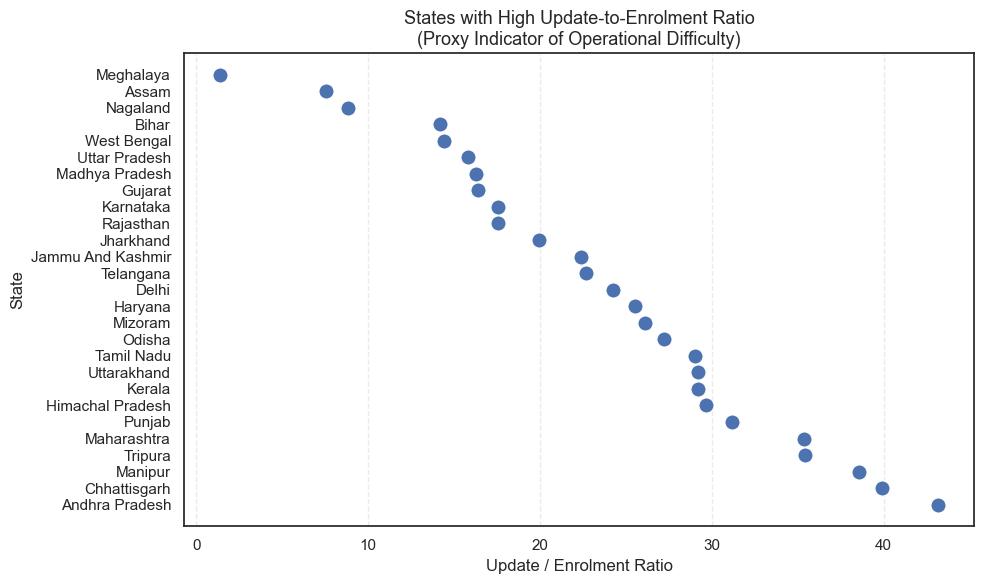

In [17]:
plot_df = ratio_df_filtered.sort_values(
    "update_enrolment_ratio", ascending=True
)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=plot_df,
    x="update_enrolment_ratio",
    y="state",
    s=120,
    color="#4C72B0"
)

plt.title(
    "States with High Update-to-Enrolment Ratio\n(Proxy Indicator of Operational Difficulty)",
    fontsize=13
)
plt.xlabel("Update / Enrolment Ratio")
plt.ylabel("State")

plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()
